# Training TinyVGG on FLowers17

#### Import Necessary Packages

In [10]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from networks.networks import TinyVGG
from preprocessors.preprocessors import ImageToArrayPreprocessor, UniformAspectPreprocessor
from datasets.datasetloader import DatasetLoader
from keras.optimizers import SGD
from imutils import paths
import numpy as np
from utils import plot_training_metrics

#### Load Data

In [11]:
image_paths=list(paths.list_images("/Users/suyashsrivastava/drig/datasets/17flowers/"))
classes=[image_path.split("/")[-2] for image_path in image_paths]
classes=[str(label) for label in np.unique(classes)]

#### Initialize Preprocessors

In [12]:
uniform_aspect=UniformAspectPreprocessor(64,64)
image_to_array=ImageToArrayPreprocessor()

#### Get Preprocessed Data & Labels

In [13]:
data_loader=DatasetLoader(preprocessors=[uniform_aspect, image_to_array])
data, labels=data_loader.load(image_paths, verbose=1)

Processed 1360/1360 Images.


#### Normalise Data

In [14]:
data=data.astype("float")/255.0

#### Split Data Into Train & Test Set

In [15]:
train_x, test_x, train_y, test_y=train_test_split(data,labels, test_size=0.25, random_state=42)

#### Get One-Hot Coded Labels

In [16]:
train_y=LabelBinarizer().fit_transform(train_y)
test_y=LabelBinarizer().fit_transform(test_y)

#### Build & Compile TinyVGG Model

In [17]:
opt=SGD(lr=0.05)
model=TinyVGG.build(width=64, height=64, depth=3, classes=len(classes))
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

#### Train Model

In [18]:
epochs=100
Z=model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=epochs, batch_size=32, verbose=1)

Epoch 1/100
32/32 [==============================] - 3s 76ms/step - loss: 3.4903 - accuracy: 0.1502 - val_loss: 2.9966 - val_accuracy: 0.0471
Epoch 2/100
32/32 [==============================] - 2s 72ms/step - loss: 1.7180 - accuracy: 0.4747 - val_loss: 3.4062 - val_accuracy: 0.0471
Epoch 3/100
32/32 [==============================] - 2s 71ms/step - loss: 1.1902 - accuracy: 0.6081 - val_loss: 4.0090 - val_accuracy: 0.0676
Epoch 4/100
32/32 [==============================] - 2s 71ms/step - loss: 0.8312 - accuracy: 0.7235 - val_loss: 4.6900 - val_accuracy: 0.0676
Epoch 5/100
32/32 [==============================] - 2s 71ms/step - loss: 0.6759 - accuracy: 0.7923 - val_loss: 4.8362 - val_accuracy: 0.0676
Epoch 6/100
32/32 [==============================] - 2s 71ms/step - loss: 0.5428 - accuracy: 0.8317 - val_loss: 5.0094 - val_accuracy: 0.0676
Epoch 7/100
32/32 [==============================] - 2s 71ms/step - loss: 0.4140 - accuracy: 0.8606 - val_loss: 5.2186 - val_accuracy: 0.0882
Epoch 

#### Run Predictions

In [ ]:
predictions=model.predict(test_x, batch_size=32)
print(classification_report(test_y.argmax(axis=1), predictions.argmax(axis=1), target_names=classes))

              precision    recall  f1-score   support

           0       0.28      0.33      0.30        15
           1       0.53      0.40      0.46        20
          10       0.77      0.74      0.75        27
          11       0.50      0.50      0.50        20
          12       0.61      0.88      0.72        16
          13       0.33      0.44      0.38        18
          14       0.74      0.74      0.74        23
          15       0.82      0.45      0.58        20
          16       0.63      0.63      0.63        19
           2       0.62      0.44      0.52        18
           3       0.61      0.64      0.62        22
           4       0.56      0.70      0.62        20
           5       0.89      0.70      0.78        23
           6       0.83      0.48      0.61        21
           7       0.25      0.39      0.31        23
           8       0.53      0.56      0.55        16
           9       1.00      0.89      0.94        19

    accuracy              

#### Plot Model Training Metrics

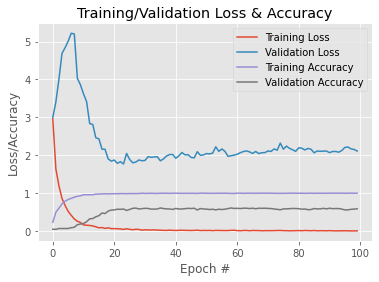

In [ ]:
plot_training_metrics(epochs,Z)